In [1196]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from functions import get_datasets, get_target_id
import glob
import os
from q_value_calc_crosslinks import calcQ
import re
from itertools import cycle
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import itertools
from cycler import cycler
import matplotlib as mpl

In [1197]:
i = 4
class_threshold = 500
dataset = get_datasets()

In [1198]:
# define output path for plots
output_path = f"../results/{dataset[i]['type']}/{dataset[i]['name']}/{class_threshold}/"
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [1199]:
# read original and additional file
input_trunk = f"../data/{dataset[i]['type']}/{dataset[i]['name']}/"
input_file_original = input_trunk + f"{dataset[i]['file']}.pkl"
input_file_perc =  input_trunk + f"{dataset[i]['file']}_{dataset[i]['comparison']}.pkl"

df_original = pd.read_pickle(input_file_original)
if dataset[i]['comparison'] != None:
    df_perc = pd.read_pickle(input_file_perc)
else:
    df_perc = None
input_trunk += f"{class_threshold}/"

## Default

In [1200]:
# read default svm files
input_path = input_trunk + "default/"
# read default svm dataframes
svm_file = input_path + f"{dataset[i]['file']}_svm.pkl"
df_svm_default_bottom = pd.read_pickle(svm_file)
display(df_svm_default_bottom)

,NuXL:isXL,Label,Score_no_svm,PSMId_no_svm,class-specific_q-val_no_svm,cum_target_id_no_svm,Score_1,PSMId_1,class-specific_q-val_1,cum_target_id_1,...,class-specific_q-val_13,cum_target_id_13,Score_14,PSMId_14,class-specific_q-val_14,cum_target_id_14,Score_15,PSMId_15,class-specific_q-val_15,cum_target_id_15
0,0,0,7.697114,1,0.560510,1099.0,-0.464042,1,0.272956,795.0,...,0.183761,702.0,0.031114,1,0.182077,703.0,0.033398,1,0.182077,703.0
2,1,1,12.854518,2,NaN,NaN,-0.024380,2,NaN,NaN,...,0.138055,1666.0,0.365131,1,0.138721,1658.0,0.367403,1,0.138118,1658.0
1,1,1,12.917113,1,0.744821,6662.0,0.032731,1,0.203294,2307.0,...,NaN,NaN,0.348254,2,NaN,NaN,0.350305,2,NaN,NaN
4,1,0,8.548115,4,NaN,NaN,-0.486374,4,NaN,NaN,...,NaN,NaN,0.007662,3,NaN,NaN,0.010489,3,NaN,NaN
3,1,0,8.609119,3,NaN,NaN,-0.429284,3,NaN,NaN,...,NaN,NaN,-0.009215,4,NaN,NaN,-0.006609,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87046,1,0,2.910212,2,NaN,NaN,-1.224790,1,0.783278,7798.0,...,0.769977,7321.0,-1.177331,1,0.767600,7358.0,-1.179490,1,0.770335,7315.0
87045,1,0,2.930583,1,0.781246,7881.0,-1.490889,2,NaN,NaN,...,NaN,NaN,-2.109676,2,NaN,NaN,-2.112340,2,NaN,NaN
87047,1,1,7.778641,1,0.774333,7644.0,-1.520285,1,0.783915,7821.0,...,0.771421,7411.0,-1.960214,1,0.769075,7418.0,-1.961239,1,0.771089,7409.0
87048,1,0,3.782600,1,0.780559,7870.0,-1.189337,1,0.783278,7798.0,...,0.765565,7260.0,-1.028695,1,0.763205,7251.0,-1.027186,1,0.765990,7239.0


In [1201]:
def plot_pseudo_roc_baseline(df_original, dfs, df_comparison, decoy_label , df_labels, output_path = output_path, iter = 5):


    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,len(dfs))))
    fig, axs = plt.subplots(len(np.unique(df_original[dataset[i]['group']])))
    for j in np.unique(df_original[dataset[i]['group']]):
        q_val = f'class-specific_q-val'
        target_ids = f'cum_target_id'
        df_original.sort_values(q_val, ascending=True, inplace=True)
        axs[j].step(df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), q_val],
                    df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), 'cum_target_id'], 
                    label=f"original", color = "black")
        for l, df in enumerate(dfs):
            k = iter
            q_val = f'class-specific_q-val_{k}'
            target_ids = f'cum_target_id_{k}'
            df.sort_values(q_val, ascending=True, inplace=True)
            axs[j].step(df.loc[(df[dataset[i]['group']]== j) & (df[q_val]<= 0.1), q_val],
                        df.loc[(df[dataset[i]['group']]== j) & (df[q_val]<= 0.1), target_ids], 
                        label=f"{df_labels[l]} iter {iter}")
        q_val = f'class-specific_q-val'
        target_ids = f'cum_target_id'
        if (not df_comparison is None):
            if (dataset[i]['comparison'] != None):
                axs[j].step(df_comparison.loc[(df_comparison[dataset[i]['group']]== j) & (df_comparison[q_val]<= 0.1), q_val],
                            df_comparison.loc[(df_comparison[dataset[i]['group']]== j) & (df_comparison[q_val]<= 0.1), 'cum_target_id'], 
                            label=f"percolator", color = "gray")
        axs[j].set_xlim(0,0.1)
        if j == 0:
            axs[j].set_title(f"peptides")
        else:
            axs[j].set_title(f"XLs")
        axs[j].set_xlabel("q-value")
        axs[j].set_ylabel("no. correct IDs")
        lgd = axs[j].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.tight_layout()

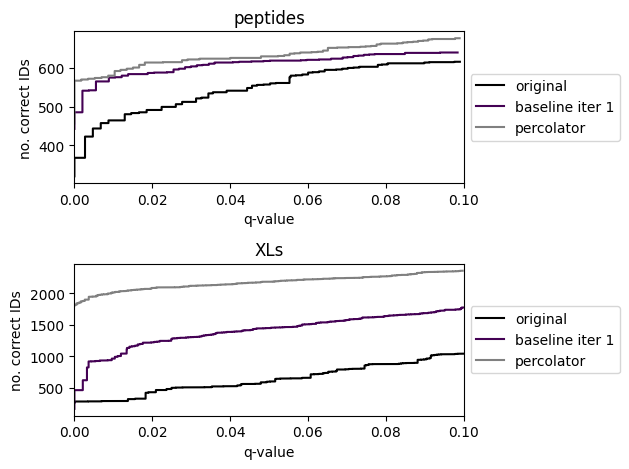

In [1202]:
plot_pseudo_roc_baseline(df_original, [df_svm_default_bottom], df_perc,  "bottom", ['baseline'] ,iter=1)

C:\Users\mail\AppData\Local\Temp\ipykernel_19884\1486942260.py:72: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


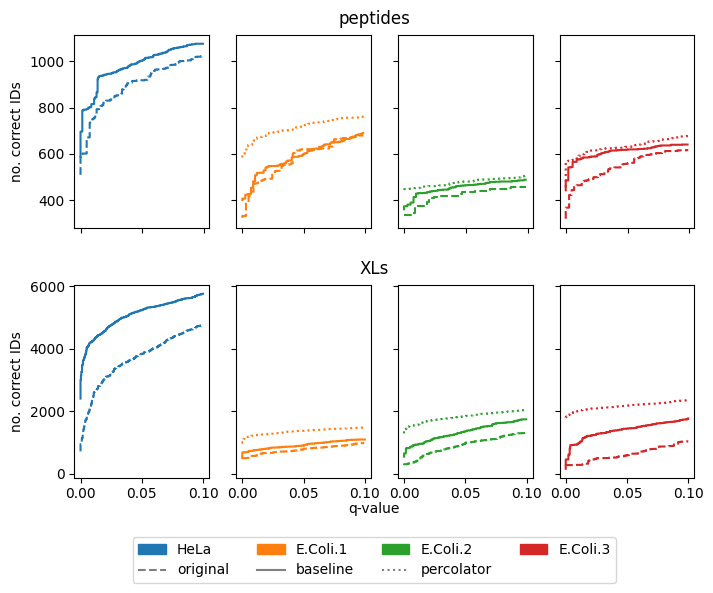

In [1203]:
i_temp = i
fig = plt.figure(figsize=(8,5))
subfigs = fig.subfigures(nrows=2)
axs = []
for row, subfig in enumerate(subfigs):
    # create 1x3 subplots per subfig
    curr_ax = subfig.subplots(nrows=1, ncols=4, sharey=True)
    axs.append(curr_ax)
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])
used_colors = []
for i in range(1,5):
    input_trunk_i = f"../data/{dataset[i]['type']}/{dataset[i]['name']}/"
    input_file_original_i = input_trunk_i + f"{dataset[i]['file']}.pkl"
    input_file_perc_i =  input_trunk_i + f"{dataset[i]['file']}_{dataset[i]['comparison']}.pkl"
    df_original_i = pd.read_pickle(input_file_original_i)
    if dataset[i]['comparison'] != None:
        df_perc_i = pd.read_pickle(input_file_perc_i)
    input_path_i = input_trunk_i + f"{class_threshold}/" + "default/"
    # read default svm dataframes
    svm_file_i = input_path_i + f"{dataset[i]['file']}_svm.pkl"
    df_svm_default_bottom_i = pd.read_pickle(svm_file_i)
    color = next(colors)
    used_colors.append(color)
    q_val = f'class-specific_q-val'
    target_ids = f'cum_target_id'
    df_original_i.sort_values(q_val, ascending=True, inplace=True)
    axs[0][i-1].step(df_original_i.loc[(df_original_i[dataset[i]['group']]== 0) & (df_original_i[q_val]<= 0.1), q_val],
                df_original_i.loc[(df_original_i[dataset[i]['group']]== 0) & (df_original_i[q_val]<= 0.1), target_ids], 
                linestyle="--", color = color, label=f"{dataset[i]['id']} original")
    axs[1][i-1].step(df_original_i.loc[(df_original_i[dataset[i]['group']]== 1) & (df_original_i[q_val]<= 0.1), q_val],
                df_original_i.loc[(df_original_i[dataset[i]['group']]== 1) & (df_original_i[q_val]<= 0.1), target_ids], 
                linestyle="--", color = color)
    if dataset[i]['comparison'] != None:
        df_perc_i.sort_values(q_val, ascending=True, inplace=True)
        axs[0][i-1].step(df_perc_i.loc[(df_perc_i[dataset[i]['group']]== 0) & (df_perc_i[q_val]<= 0.1), q_val],
                                df_perc_i.loc[(df_perc_i[dataset[i]['group']]== 0) & (df_perc_i[q_val]<= 0.1), 'cum_target_id'], 
                                label=f"percolator", color = color, linestyle=":")  
        axs[1][i-1].step(df_perc_i.loc[(df_perc_i[dataset[i]['group']]== 1) & (df_perc_i[q_val]<= 0.1), q_val],
                                df_perc_i.loc[(df_perc_i[dataset[i]['group']]== 1) & (df_perc_i[q_val]<= 0.1), 'cum_target_id'], 
                                label=f"percolator", color = color, linestyle=":")  

    k = 1
    q_val = f'class-specific_q-val_{k}'
    target_ids = f'cum_target_id_{k}'
    df_svm_default_bottom_i.sort_values(q_val, ascending=True, inplace=True)
    line, = axs[0][i-1].step(df_svm_default_bottom_i.loc[(df_svm_default_bottom_i[dataset[i]['group']]== 0) & (df_svm_default_bottom_i[q_val]<= 0.1), q_val],
                df_svm_default_bottom_i.loc[(df_svm_default_bottom_i[dataset[i]['group']]== 0) & (df_svm_default_bottom_i[q_val]<= 0.1), target_ids], 
                color = color)
    line, = axs[1][i-1].step(df_svm_default_bottom_i.loc[(df_svm_default_bottom_i[dataset[i]['group']]== 1) & (df_svm_default_bottom_i[q_val]<= 0.1), q_val],
                df_svm_default_bottom_i.loc[(df_svm_default_bottom_i[dataset[i]['group']]== 1) & (df_svm_default_bottom_i[q_val]<= 0.1), target_ids]
                , color = color)  
    handles = []
for i, color in enumerate(used_colors):
    handles.append(mpatches.Patch(color=color, label=dataset[i+1]['id']))
handles.extend([Line2D([0], [0], label='original', color='gray', linestyle="--"),
                Line2D([0], [0], label='baseline', color='gray'),
                Line2D([0], [0], label='percolator', color='gray', linestyle=":"),
                Line2D([0],[0],color="w")])
handles = [item for pair in zip(handles[:4], handles[4:]) for item in pair]
lgd = fig.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)

for ax in axs[0]:
    ax.tick_params(labelbottom=False)    
axs[0][0].set_ylabel("no. correct IDs")
axs[1][0].set_ylabel("no. correct IDs")
tit = subfigs[0].suptitle("peptides")
subfigs[1].suptitle("XLs")
subfigs[1].supxlabel("q-value", va="top", fontsize="medium")
fig.savefig(f"../results/crosslink_data/baseline_comparison.png",bbox_extra_artists=(lgd,tit), bbox_inches='tight')   
fig.show()
i = i_temp

In [1204]:
def plot_pseudo_roc(df_original, df_svm, df_comparison, decoy_label , output_path = output_path):

    max_iterations = -1
    for col in df_svm.columns:
        if re.search("Score_\d*", col )!= None:
            max_iterations += 1

    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,max_iterations)))
    fig, axs = plt.subplots(len(np.unique(df_original[dataset[i]['group']])), sharex=True, figsize=(6,5))
    for j in np.unique(df_original[dataset[i]['group']]):
        q_val = f'class-specific_q-val'
        target_ids = f'cum_target_id'
        df_original.sort_values(q_val, ascending=True, inplace=True)
        axs[j].step(df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), q_val],
                    df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), 'cum_target_id'], 
                    label=f"original" if j == 0 else "", color = "black")
        for k in range(1,max_iterations+1):
            q_val = f'class-specific_q-val_{k}'
            target_ids = f'cum_target_id_{k}'
            df_svm.sort_values(q_val, ascending=True, inplace=True)
            axs[j].step(df_svm.loc[(df_svm[dataset[i]['group']]== j) & (df_svm[q_val]<= 0.1), q_val],
                        df_svm.loc[(df_svm[dataset[i]['group']]== j) & (df_svm[q_val]<= 0.1), target_ids], 
                        label=f"iteration {k}" if j == 0 else "")
        q_val = f'class-specific_q-val'
        target_ids = f'cum_target_id'
        if (not df_comparison is None) & (dataset[i]['comparison'] != None):
            axs[j].step(df_comparison.loc[(df_comparison[dataset[i]['group']]== j) & (df_comparison[q_val]<= 0.1), q_val],
                        df_comparison.loc[(df_comparison[dataset[i]['group']]== j) & (df_comparison[q_val]<= 0.1), 'cum_target_id'], 
                        label=f"{dataset[i]['comparison']}" if j == 0 else "", color = "gray")
        axs[j].set_xlim(0,0.1)
        if j == 0:
            axs[j].set_title(f"peptides")
        else:
            axs[j].set_title(f"XLs")
        
        axs[j].set_ylabel("no. correct IDs")
    lgd = fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0), ncol=3)
    axs[j].set_xlabel("q-value")
    fig.tight_layout()
    plt.savefig(output_path + f"{dataset[i]['name']}_{decoy_label}.png",bbox_extra_artists=(lgd,), bbox_inches='tight')

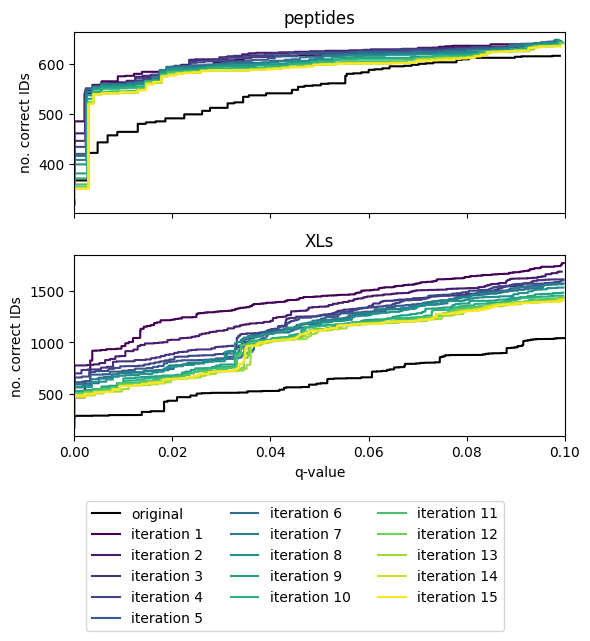

In [1205]:
plot_pseudo_roc(df_original, df_svm_default_bottom, None,"bottom")

## Unique peptides

In [1206]:
input_path = input_trunk + "pep_unique/"
# read svm with decoy second files
svm_file = input_path + f"{dataset[i]['file']}_svm.pkl"
df_svm_pep = pd.read_pickle(svm_file)

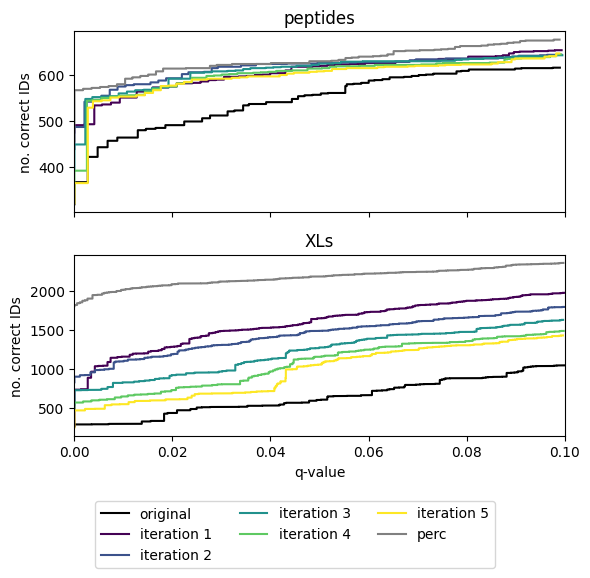

In [1207]:
plot_pseudo_roc(df_original, df_svm_pep, df_perc, "pep_unique")

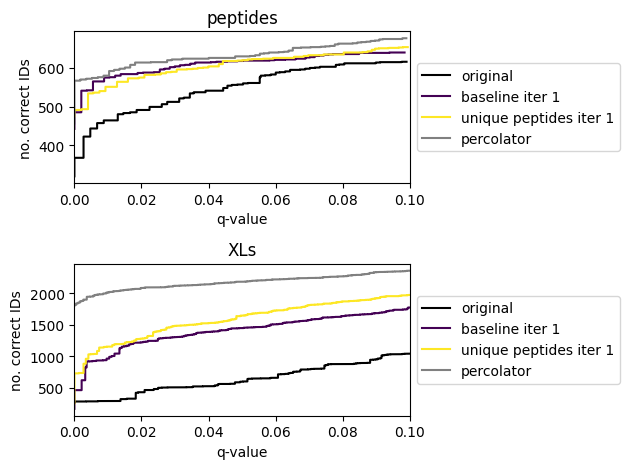

In [1208]:
plot_pseudo_roc_baseline(df_original, [df_svm_default_bottom, df_svm_pep], df_perc,  "bottom", ['baseline', 'unique peptides'], iter=1)

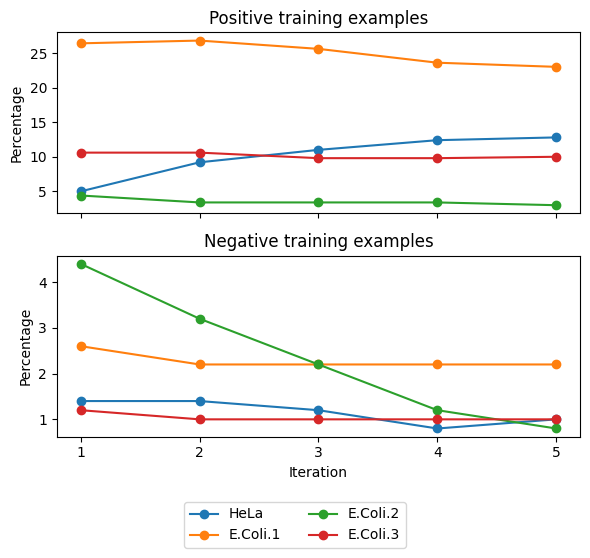

In [1209]:
i_temp = i
fig, axs = plt.subplots(2, sharex=True, figsize=(6,5))
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])
for i in range(1,5):
    input_trunk_i = f"../data/{dataset[i]['type']}/{dataset[i]['name']}/"
    input_trunk_i += f"{class_threshold}/"
    input_path_i = input_trunk_i + "default/"
    # read svm with decoy second files
    bottom_counts_file = input_path_i + f"bottom_counts_baseline.pkl"
    bottom_counts = pd.read_pickle(bottom_counts_file)
    top_counts_file = input_path_i + f"top_counts_baseline.pkl"
    top_counts = pd.read_pickle(top_counts_file)
    color = next(colors)
    axs[0].plot(range(1,6), top_counts.loc[0,:]*100, label=dataset[i]['id'], linestyle='-', marker='o', color = color)
    axs[1].plot(range(1,6), bottom_counts.loc[0,:]*100, linestyle='-', marker='o',color=color)
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0), ncol=2)
axs[0].set_title("Positive training examples")
axs[1].set_title("Negative training examples")
plt.xlabel("Iteration")
plt.xticks(range(1,6), range(1,6))
axs[0].set_ylabel("Percentage")
axs[1].set_ylabel("Percentage")
fig.tight_layout()
fig.savefig(f"../results/crosslink_data/max_peptide_occurance.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
i = i_temp

C:\Users\mail\AppData\Local\Temp\ipykernel_19884\1133103608.py:54: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


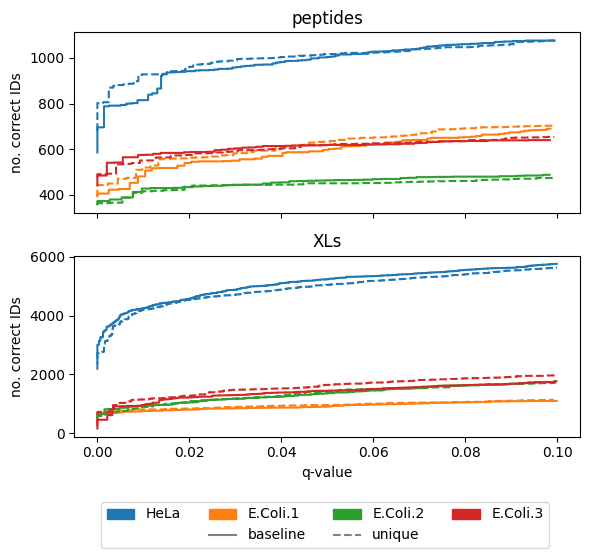

In [1210]:
i_temp = i
fig, axs = plt.subplots(2, sharex=True, figsize=(6,5))
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])
used_colors = []
for i in range(1,5):
    input_trunk_i = f"../data/{dataset[i]['type']}/{dataset[i]['name']}/"
    
    input_path_i = input_trunk_i + f"{class_threshold}/" + "pep_unique/"
    
    input_file_original_i = input_path_i + f"{dataset[i]['file']}_svm.pkl"
    input_path_i = input_trunk_i + f"{class_threshold}/" + "default/"
    # read default svm dataframes
    svm_file_i = input_path_i + f"{dataset[i]['file']}_svm.pkl"
    df_original_i = pd.read_pickle(input_file_original_i)
    df_svm_default_bottom_i = pd.read_pickle(svm_file_i)
    color = next(colors)
    used_colors.append(color)
    k = 1
    q_val = f'class-specific_q-val_{k}'
    target_ids = f'cum_target_id_{k}'
    df_original_i.sort_values(q_val, ascending=True, inplace=True)
    axs[0].step(df_original_i.loc[(df_original_i[dataset[i]['group']]== 0) & (df_original_i[q_val]<= 0.1), q_val],
                df_original_i.loc[(df_original_i[dataset[i]['group']]== 0) & (df_original_i[q_val]<= 0.1), target_ids], 
                linestyle="--", color = color, label=f"{dataset[i]['id']} unique peptides")
    axs[1].step(df_original_i.loc[(df_original_i[dataset[i]['group']]== 1) & (df_original_i[q_val]<= 0.1), q_val],
                df_original_i.loc[(df_original_i[dataset[i]['group']]== 1) & (df_original_i[q_val]<= 0.1), target_ids], 
                linestyle="--", color = color)
    df_svm_default_bottom_i.sort_values(q_val, ascending=True, inplace=True)
    line, = axs[0].step(df_svm_default_bottom_i.loc[(df_svm_default_bottom_i[dataset[i]['group']]== 0) & (df_svm_default_bottom_i[q_val]<= 0.1), q_val],
                df_svm_default_bottom_i.loc[(df_svm_default_bottom_i[dataset[i]['group']]== 0) & (df_svm_default_bottom_i[q_val]<= 0.1), target_ids], 
                color = color)
    line, = axs[1].step(df_svm_default_bottom_i.loc[(df_svm_default_bottom_i[dataset[i]['group']]== 1) & (df_svm_default_bottom_i[q_val]<= 0.1), q_val],
                df_svm_default_bottom_i.loc[(df_svm_default_bottom_i[dataset[i]['group']]== 1) & (df_svm_default_bottom_i[q_val]<= 0.1), target_ids]
                , color = color)    
handles = []
for i, color in enumerate(used_colors):
    handles.append(mpatches.Patch(color=color, label=dataset[i+1]['id']))
handles.extend([Line2D([0],[0],color="w"), 
                Line2D([0], [0], label='baseline', color='gray'),
                Line2D([0], [0], label='unique', color='gray', linestyle="--"),
                Line2D([0],[0],color="w")])
handles = [item for pair in zip(handles[:4], handles[4:]) for item in pair]
fig.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.55, 0), ncol=4)
axs[0].set_title("peptides")
axs[1].set_title("XLs")
plt.xlabel("q-value")
axs[0].set_ylabel("no. correct IDs")
axs[1].set_ylabel("no. correct IDs")
fig.tight_layout()
fig.savefig(f"../results/crosslink_data/unique_peptides.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
    
fig.show()
i = i_temp

## Mixture-model

In [1211]:
input_path = input_trunk + "mixture_model/"
# read svm with decoy second files
svm_file = input_path + f"{dataset[i]['file']}_svm.pkl"
df_mixture_model = pd.read_pickle(svm_file)

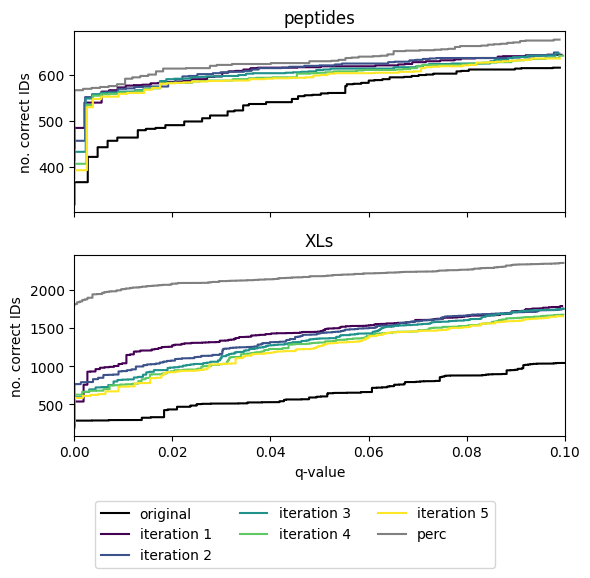

In [1212]:
plot_pseudo_roc(df_original, df_mixture_model, df_perc, "mixture-model")

In [1213]:
input_path = input_trunk + "mixture_model/FDR5%/"
# read svm with decoy second files
svm_file = input_path + f"{dataset[i]['file']}_svm.pkl"
df_mixture_model_fdr5 = pd.read_pickle(svm_file)

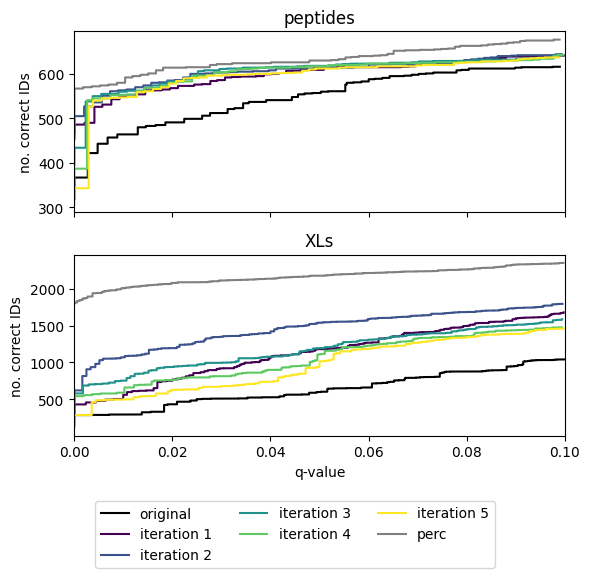

In [1214]:
plot_pseudo_roc(df_original, df_mixture_model_fdr5, df_perc, "mixture-model FDR 5%")

In [1215]:
input_path = input_trunk + "mixture_model/FDR5%/bottom_fdr/"
# read svm with decoy second files
svm_file = input_path + f"{dataset[i]['file']}_svm.pkl"
df_mixture_model_fdr5_bottom = pd.read_pickle(svm_file)

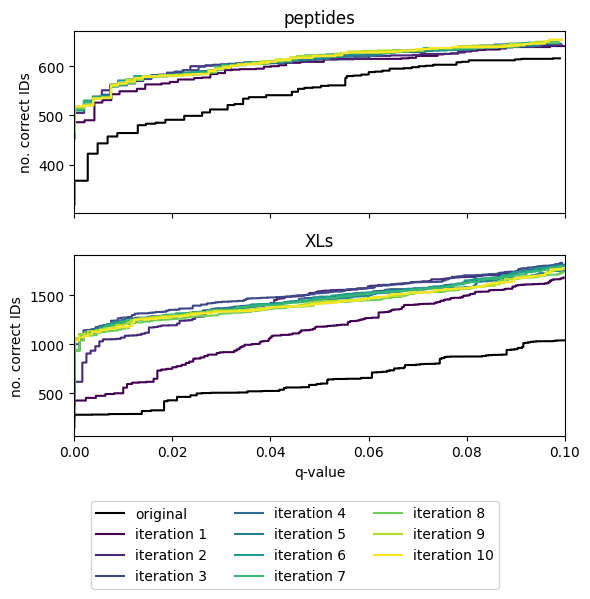

In [1216]:
plot_pseudo_roc(df_original, df_mixture_model_fdr5_bottom, None, "mixture-model FDR 5% incl. bottom")

In [1217]:
input_path = input_trunk + "mixture_model/FDR1%/"
# read svm with decoy second files
svm_file = input_path + f"{dataset[i]['file']}_svm.pkl"
df_mixture_model_fdr1 = pd.read_pickle(svm_file)

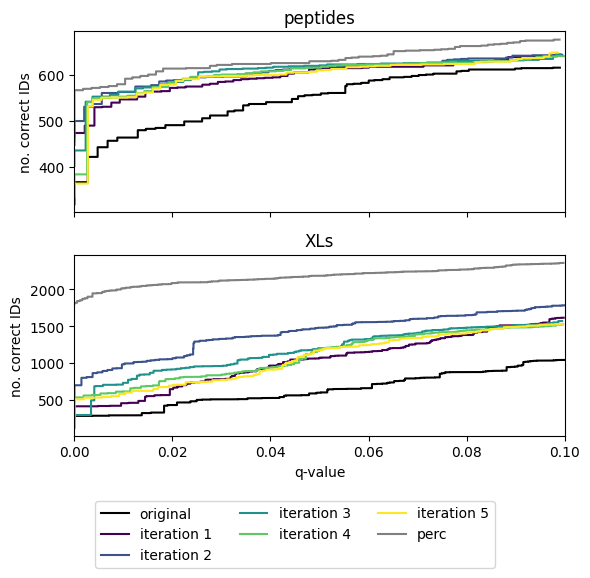

In [1218]:
plot_pseudo_roc(df_original, df_mixture_model_fdr1, df_perc, "mixture-model FDR 1%")

In [1219]:
input_path = input_trunk + "mixture_model/FDR1%/bottom_fdr/"
# read svm with decoy second files
svm_file = input_path + f"{dataset[i]['file']}_svm.pkl"
df_mixture_model_fdr1_bottom = pd.read_pickle(svm_file)

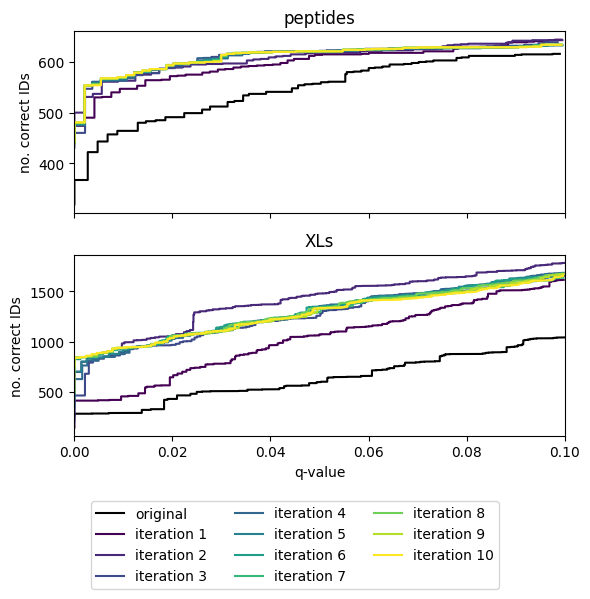

In [1220]:
plot_pseudo_roc(df_original, df_mixture_model_fdr1_bottom, None, "mixture-model FDR 1% incl. bottom")

### Comparison

In [1221]:
def plot_pseudo_roc_comparison(df_original, df_comparison, df_decoy_bottom, models, model_labels, iteration = 1, output_path = output_path):
    c = mpl.colormaps['Paired'].colors
    plt.rcParams['axes.prop_cycle'] = cycler(color=c)
    fig, axs = plt.subplots(len(np.unique(df_original[dataset[i]['group']])))
    for j in np.unique(df_original[dataset[i]['group']]):
        q_val = f'class-specific_q-val'
        target_ids = f'cum_target_id'
        df_original.sort_values(q_val, ascending=True, inplace=True)
        axs[j].step(df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), q_val],
                    df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), target_ids], 
                    label=f"original"if j == 0 else "", color = "black")
        q_val = f'class-specific_q-val_{iteration}'
        target_ids = f'cum_target_id_{iteration}'
        df_decoy_bottom.sort_values(q_val, ascending=True, inplace=True)
        axs[j].step(df_decoy_bottom.loc[(df_decoy_bottom[dataset[i]['group']]== j) & (df_decoy_bottom[q_val]<= 0.1), q_val],
                    df_decoy_bottom.loc[(df_decoy_bottom[dataset[i]['group']]== j) & (df_decoy_bottom[q_val]<= 0.1), target_ids], 
                    label=f"baseline"if j == 0 else "", color = "red")
        for model, model_label in zip(models, model_labels):
            model.sort_values(q_val, ascending=True, inplace=True)
            axs[j].step(model.loc[(model[dataset[i]['group']]== j) & (model[q_val]<= 0.1), q_val],
                        model.loc[(model[dataset[i]['group']]== j) & (model[q_val]<= 0.1), target_ids], 
                        label=f"{model_label}"if j == 0 else "")
        q_val = f'class-specific_q-val'
        target_ids = f'cum_target_id'
        if dataset[i]['comparison'] != None and df_comparison != None:
            df_comparison.sort_values(q_val, ascending=True, inplace=True)
            axs[j].step(df_comparison.loc[(df_comparison[dataset[i]['group']]== j) & (df_comparison[q_val]<= 0.1), q_val],
                        df_comparison.loc[(df_comparison[dataset[i]['group']]== j) & (df_comparison[q_val]<= 0.1), target_ids], 
                        label=f"{dataset[i]['comparison']}"if j == 0 else "" , color = "gray")
        axs[j].set_xlim(0,0.1)
        if j == 0:
            axs[j].set_title(f"peptides")
        else:
            axs[j].set_title(f"XLs")
        axs[j].set_ylabel("no. target IDs")
    lgd = fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0), ncol=2)
    axs[j].set_xlabel("q-value")
    fig.tight_layout()
    plt.savefig(output_path + f"{dataset[i]['name']}_comparison_mixture_model_iter_{iteration}.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
    #plt.show()

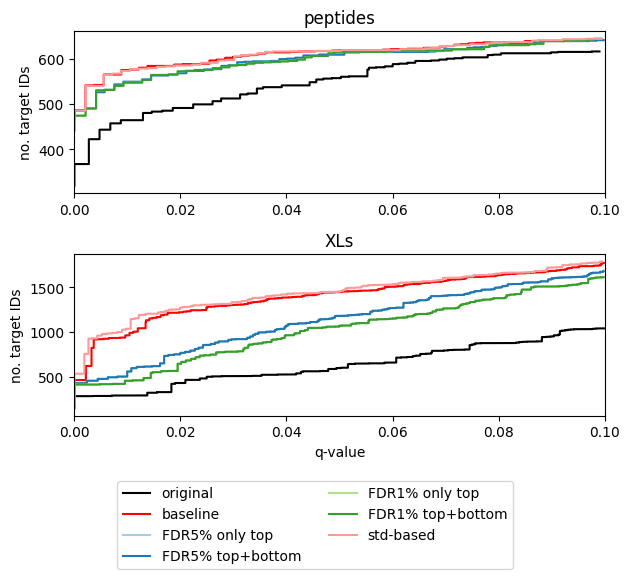

In [1222]:
plot_pseudo_roc_comparison(df_original, None, df_svm_default_bottom, [df_mixture_model_fdr5, df_mixture_model_fdr5_bottom, df_mixture_model_fdr1, df_mixture_model_fdr1_bottom, df_mixture_model], ["FDR5% only top","FDR5% top+bottom", "FDR1% only top", "FDR1% top+bottom", "std-based"], output_path = output_path)

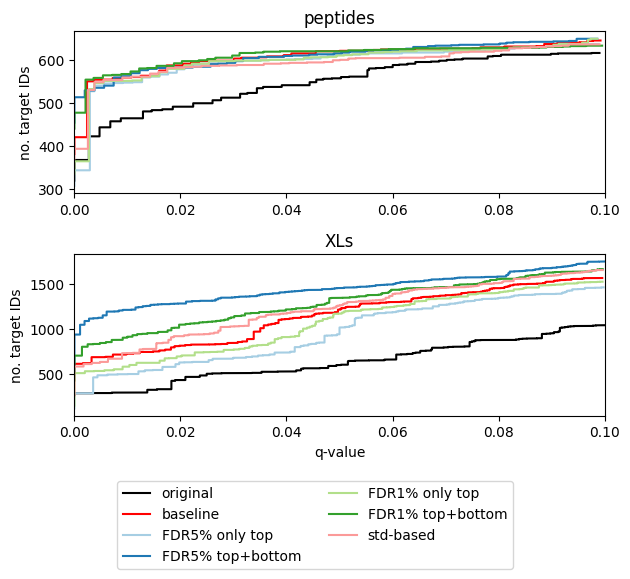

In [1223]:
plot_pseudo_roc_comparison(df_original, None, df_svm_default_bottom, [df_mixture_model_fdr5, df_mixture_model_fdr5_bottom, df_mixture_model_fdr1, df_mixture_model_fdr1_bottom, df_mixture_model], ["FDR5% only top","FDR5% top+bottom", "FDR1% only top", "FDR1% top+bottom", "std-based"], iteration=5, output_path = output_path)

In [1224]:
def plot_pseudo_roc_comparison_best(df_original, df_comparison, df_decoy_bottom, models, model_labels, iterations, output_path = output_path):
    c = mpl.colormaps['Paired'].colors
    plt.rcParams['axes.prop_cycle'] = cycler(color=c)
    fig, axs = plt.subplots(len(np.unique(df_original[dataset[i]['group']])), figsize=(6,5), sharex=True)
    for j in np.unique(df_original[dataset[i]['group']]):
        q_val = f'class-specific_q-val'
        target_ids = f'cum_target_id'
        df_original.sort_values(q_val, ascending=True, inplace=True)
        axs[j].step(df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), q_val],
                    df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), target_ids], 
                    label=f"original" if j == 0 else "", color = "black")
        q_val = f'class-specific_q-val_1'
        target_ids = f'cum_target_id_1'
        df_decoy_bottom.sort_values(q_val, ascending=True, inplace=True)
        axs[j].step(df_decoy_bottom.loc[(df_decoy_bottom[dataset[i]['group']]== j) & (df_decoy_bottom[q_val]<= 0.1), q_val],
                    df_decoy_bottom.loc[(df_decoy_bottom[dataset[i]['group']]== j) & (df_decoy_bottom[q_val]<= 0.1), target_ids], 
                    label=f"baseline"if j == 0 else "", color = "red")
        for model, model_label, iteration in zip(models, model_labels, iterations):
            q_val = f'class-specific_q-val_{iteration}'
            target_ids = f'cum_target_id_{iteration}'
            model.sort_values(q_val, ascending=True, inplace=True)
            axs[j].step(model.loc[(model[dataset[i]['group']]== j) & (model[q_val]<= 0.1), q_val],
                        model.loc[(model[dataset[i]['group']]== j) & (model[q_val]<= 0.1), target_ids], 
                        label=f"{model_label} (iter: {iteration})"if j == 0 else "")
        q_val = f'class-specific_q-val'
        target_ids = f'cum_target_id'
        if dataset[i]['comparison'] != None and df_comparison != None:
            df_comparison.sort_values(q_val, ascending=True, inplace=True)
            axs[j].step(df_comparison.loc[(df_comparison[dataset[i]['group']]== j) & (df_comparison[q_val]<= 0.1), q_val],
                        df_comparison.loc[(df_comparison[dataset[i]['group']]== j) & (df_comparison[q_val]<= 0.1), target_ids], 
                        label=f"{dataset[i]['comparison']}" if j == 0 else "" , color = "gray")
        axs[j].set_xlim(0,0.1)
        if j == 0:
            axs[j].set_title(f"peptides")
        else:
            axs[j].set_title(f"XLs")
        
        axs[j].set_ylabel("no. correct IDs")
    lgd = fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0), ncol=2)
    axs[j].set_xlabel("q-value")
    #tit = fig.suptitle(f"Comparison Mixture Model\n{dataset[i]['name']}\nBest iteration")
    fig.tight_layout()
    plt.savefig(output_path + f"{dataset[i]['name']}_comparison_mixture_model_iter_best.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
    #plt.show()

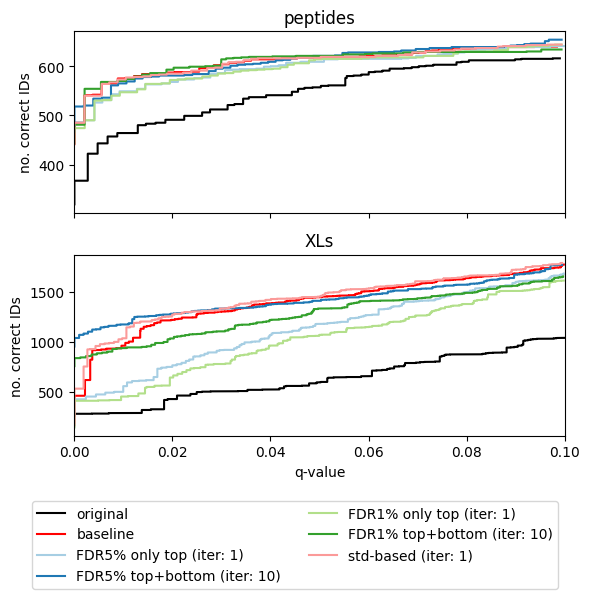

In [1225]:
plot_pseudo_roc_comparison_best(df_original, None, df_svm_default_bottom, [df_mixture_model_fdr5, df_mixture_model_fdr5_bottom, df_mixture_model_fdr1, df_mixture_model_fdr1_bottom, df_mixture_model], ["FDR5% only top","FDR5% top+bottom", "FDR1% only top", "FDR1% top+bottom", "std-based"], iterations= [1,10,1,10,1] if i == 4 else [1,1,1,1,1], output_path = output_path)

## Spectral Bias

### Second

In [1226]:
input_path = input_trunk + "default/decoy_second/"
# read svm with decoy second files
svm_file = input_path + f"{dataset[i]['file']}_svm.pkl"
df_svm_second_decoy = pd.read_pickle(svm_file)

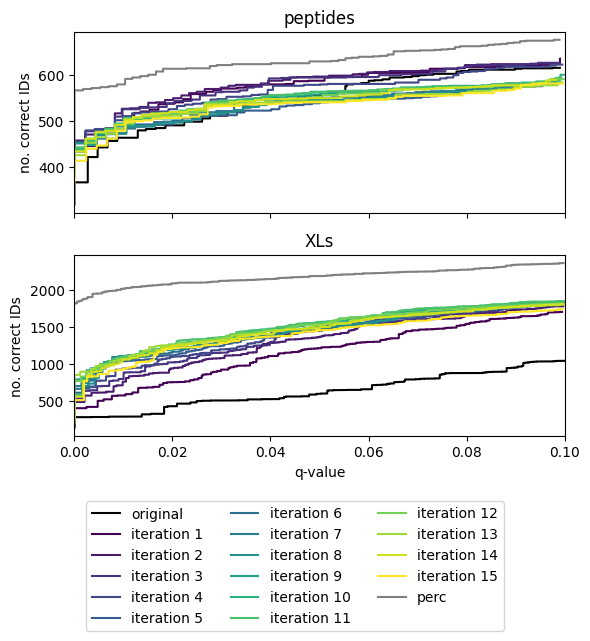

In [1227]:
plot_pseudo_roc(df_original, df_svm_second_decoy, df_perc, "second")

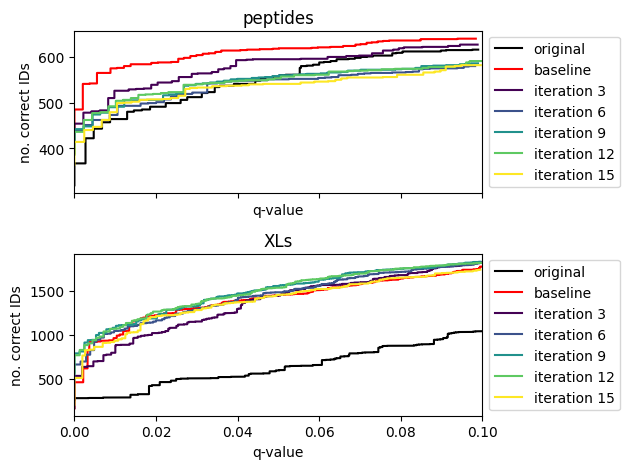

In [1228]:
if i == 4:
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,5)))
    fig, axs = plt.subplots(len(np.unique(df_original[dataset[i]['group']])), sharex=True)
    for j in np.unique(df_original[dataset[i]['group']]):
        q_val = f'class-specific_q-val'
        target_ids = f'cum_target_id'
        df_original.sort_values(q_val, ascending=True, inplace=True)
        axs[j].step(df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), q_val],
                    df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), 'cum_target_id'], 
                    label=f"original", color = "black")
        for k in range(1,2):
            q_val = f'class-specific_q-val_{k}'
            target_ids = f'cum_target_id_{k}'
            df_svm_default_bottom.sort_values(q_val, ascending=True, inplace=True)
            axs[j].step(df_svm_default_bottom.loc[(df_svm_default_bottom[dataset[i]['group']]== j) & (df_svm_default_bottom[q_val]<= 0.1), q_val],
                        df_svm_default_bottom.loc[(df_svm_default_bottom[dataset[i]['group']]== j) & (df_svm_default_bottom[q_val]<= 0.1), target_ids], 
                        label=f"baseline", color = "red")
        for k in range(1,15+1):
            if k % 3 == 0:
                q_val = f'class-specific_q-val_{k}'
                target_ids = f'cum_target_id_{k}'
                df_svm_second_decoy.sort_values(q_val, ascending=True, inplace=True)
                axs[j].step(df_svm_second_decoy.loc[(df_svm_second_decoy[dataset[i]['group']]== j) & (df_svm_second_decoy[q_val]<= 0.1), q_val],
                            df_svm_second_decoy.loc[(df_svm_second_decoy[dataset[i]['group']]== j) & (df_svm_second_decoy[q_val]<= 0.1), target_ids], 
                            label=f"iteration {k}")
        axs[j].set_xlim(0,0.1)
        if j == 0:
            axs[j].set_title(f"peptides")
        else:
            axs[j].set_title(f"XLs")
        axs[j].set_xlabel("q-value")
        axs[j].set_ylabel("no. correct IDs")
        lgd = axs[j].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.tight_layout()
    plt.savefig(output_path + f"{dataset[i]['name']}_second_many_iterations.png",bbox_extra_artists=(lgd,), bbox_inches='tight')

    plt.show()

### Last

In [1229]:
input_path = input_trunk + "default/decoy_last/"
# read svm with decoy last files
svm_file = input_path + f"{dataset[i]['file']}_svm.pkl"
df_svm_last_decoy = pd.read_pickle(svm_file)

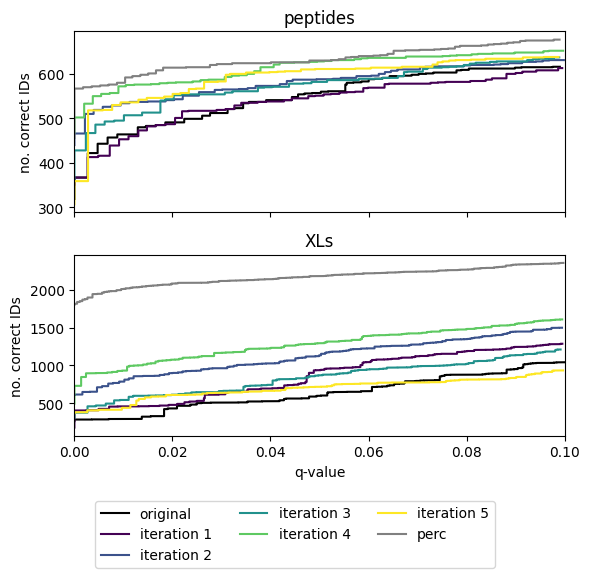

In [1230]:
plot_pseudo_roc(df_original, df_svm_last_decoy, df_perc, "last")

### Bottom+Last

In [1231]:
input_path = input_trunk + "default/decoy_bottom+last/"
# read svm with decoy last files
svm_file = input_path + f"{dataset[i]['file']}_svm.pkl"
df_svm_bottom_last_decoy = pd.read_pickle(svm_file)

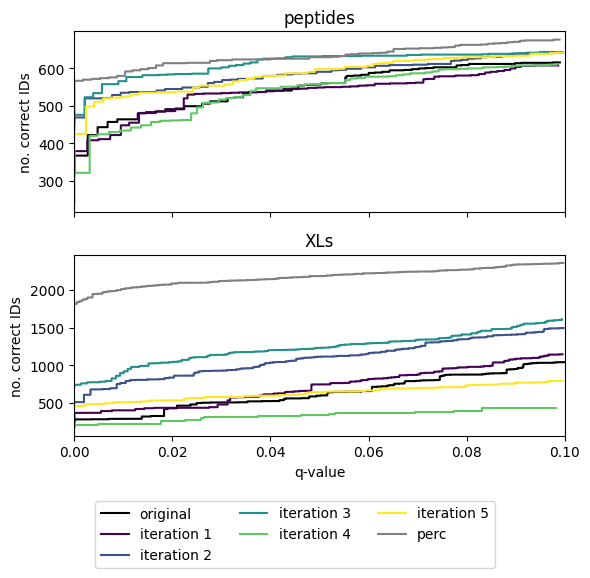

In [1232]:
plot_pseudo_roc(df_original, df_svm_bottom_last_decoy, df_perc, "bottom+last")

### Bottom+second

In [1233]:
input_path = input_trunk + "default/decoy_bottom+second/"
# read svm with decoy last files
svm_file = input_path + f"{dataset[i]['file']}_svm.pkl"
df_svm_bottom_second_decoy = pd.read_pickle(svm_file)

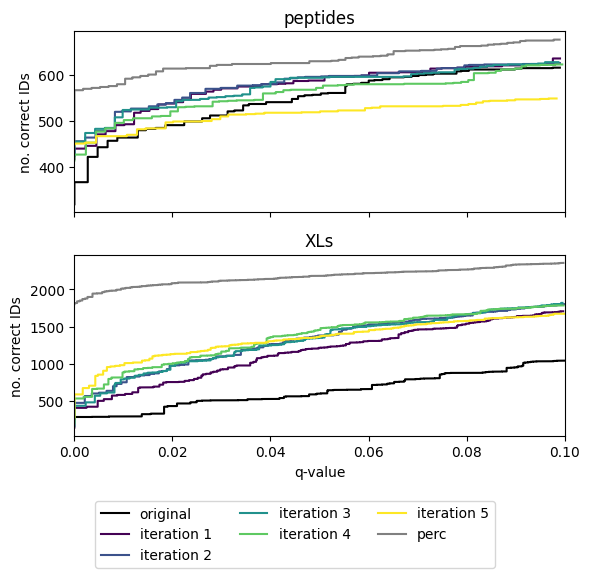

In [1234]:
plot_pseudo_roc(df_original,df_svm_bottom_second_decoy, df_perc, "bottom+second")

### Comparison Decoy Choice

In [1235]:
def plot_pseudo_roc_comparison(df_original, df_comparison, df_decoy_bottom, df_decoy_last, df_decoy_second, df_decoy_bottom_last, df_decoy_bottom_second, iteration = 1, output_path = output_path):
    c = mpl.colormaps['Paired'].colors
    plt.rcParams['axes.prop_cycle'] = cycler(color=c)
    fig, axs = plt.subplots(len(np.unique(df_original[dataset[i]['group']])), figsize=(6,5))
    for j in np.unique(df_original[dataset[i]['group']]):
        q_val = f'class-specific_q-val'
        target_ids = f'cum_target_id'
        df_original.sort_values(q_val, ascending=True, inplace=True)
        axs[j].step(df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), q_val],
                    df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), target_ids], 
                    label=f"original" if j == 0 else "", color = "black")
        q_val = f'class-specific_q-val_{iteration}'
        target_ids = f'cum_target_id_{iteration}'
        df_decoy_bottom.sort_values(q_val, ascending=True, inplace=True)
        axs[j].step(df_decoy_bottom.loc[(df_decoy_bottom[dataset[i]['group']]== j) & (df_decoy_bottom[q_val]<= 0.1), q_val],
                    df_decoy_bottom.loc[(df_decoy_bottom[dataset[i]['group']]== j) & (df_decoy_bottom[q_val]<= 0.1), target_ids], 
                    label=f"baseline" if j == 0 else "", color = "red")
        df_decoy_second.sort_values(q_val, ascending=True, inplace=True)
        axs[j].step(df_decoy_second.loc[(df_decoy_second[dataset[i]['group']]== j) & (df_decoy_second[q_val]<= 0.1), q_val],
                    df_decoy_second.loc[(df_decoy_second[dataset[i]['group']]== j) & (df_decoy_second[q_val]<= 0.1), target_ids], 
                    label=f"2nd rank" if j == 0 else "")
        df_decoy_bottom_second.sort_values(q_val, ascending=True, inplace=True)
        axs[j].step(df_decoy_bottom_second.loc[(df_decoy_bottom_second[dataset[i]['group']]== j) & (df_decoy_bottom_second[q_val]<= 0.1), q_val],
                    df_decoy_bottom_second.loc[(df_decoy_bottom_second[dataset[i]['group']]== j) & (df_decoy_bottom_second[q_val]<= 0.1), target_ids], 
                    label=f"bottom+2nd rank" if j == 0 else "")
        df_decoy_last.sort_values(q_val, ascending=True, inplace=True)
        axs[j].step(df_decoy_last.loc[(df_decoy_last[dataset[i]['group']]== j) & (df_decoy_last[q_val]<= 0.1), q_val],
                    df_decoy_last.loc[(df_decoy_last[dataset[i]['group']]== j) & (df_decoy_last[q_val]<= 0.1), target_ids], 
                    label=f"last rank" if j == 0 else "")
        df_decoy_bottom_last.sort_values(q_val, ascending=True, inplace=True)
        axs[j].step(df_decoy_bottom_last.loc[(df_decoy_bottom_last[dataset[i]['group']]== j) & (df_decoy_bottom_last[q_val]<= 0.1), q_val],
                    df_decoy_bottom_last.loc[(df_decoy_bottom_last[dataset[i]['group']]== j) & (df_decoy_bottom_last[q_val]<= 0.1), target_ids], 
                    label=f"bottom+last rank" if j == 0 else "")       
        axs[j].set_xlim(0,0.1)
        if j == 0:
            axs[j].set_title(f"peptides")
        else:
            axs[j].set_title(f"XLs")
        axs[j].set_xlabel("q-value")
        axs[j].set_ylabel("no. correct IDs")
    lgd = fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0), ncol= 3)
    fig.tight_layout()
    fig.savefig(output_path + f"{dataset[i]['name']}_comparison_decoy_choice_iter_{iteration}.png",bbox_extra_artists=(lgd,), bbox_inches='tight')

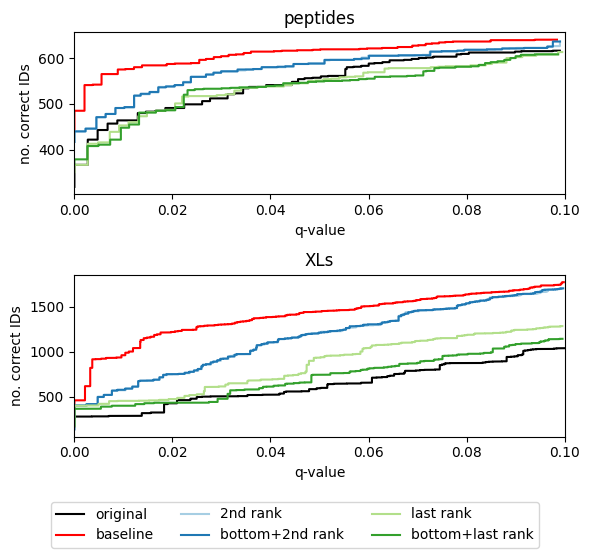

In [1236]:
plot_pseudo_roc_comparison(df_original, df_perc, df_svm_default_bottom, df_svm_last_decoy, df_svm_second_decoy, df_svm_bottom_last_decoy, df_svm_bottom_second_decoy, output_path = output_path)

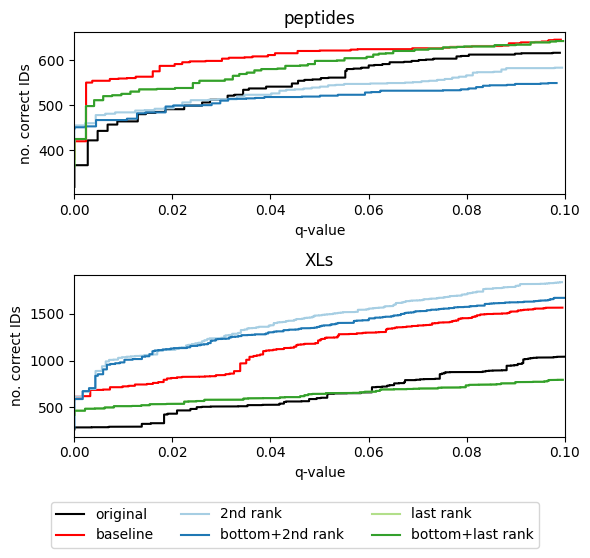

In [1237]:
plot_pseudo_roc_comparison(df_original, df_perc, df_svm_default_bottom, df_svm_bottom_last_decoy, df_svm_second_decoy, df_svm_bottom_last_decoy, df_svm_bottom_second_decoy, iteration=5, output_path = output_path)

## No rerank

In [1238]:
not_reranked_file = f"../data/{dataset[i]['type']}/{dataset[i]['name']}/{dataset[i]['file']}_SVM_filtered_no_rerank_iter_1.pkl"
df_not_reranked = pd.read_pickle(not_reranked_file)

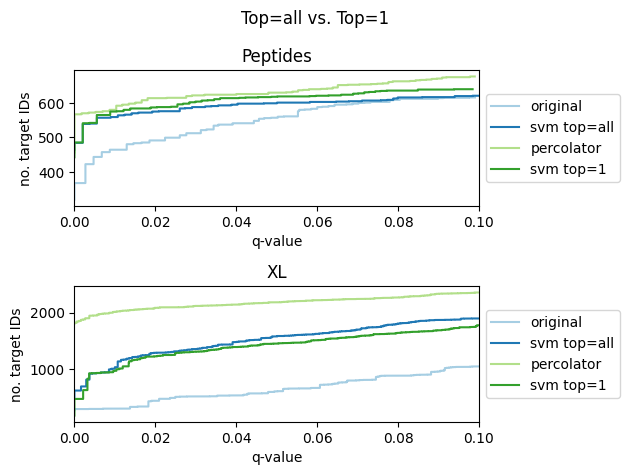

In [1239]:
fig, axs = plt.subplots(len(np.unique(df_original[dataset[i]['group']])))
for j in np.unique(df_original[dataset[i]['group']]):
    q_val = f'class-specific_q-val'
    target_ids = f'cum_target_id'
    df_original.sort_values(q_val, ascending=True, inplace=True)
    axs[j].step(df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), q_val],
                df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), target_ids], 
                label=f"original")
    df_not_reranked.sort_values(q_val, ascending=True, inplace=True)
    axs[j].step(df_not_reranked.loc[(df_not_reranked[dataset[i]['group']]== j) & (df_not_reranked[q_val]<= 0.1), q_val],
                df_not_reranked.loc[(df_not_reranked[dataset[i]['group']]== j) & (df_not_reranked[q_val]<= 0.1), target_ids], 
                label=f"svm top=all")
    if dataset[i]['comparison'] != None:
        df_perc.sort_values(q_val, ascending=True, inplace=True)
        axs[j].step(df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc[q_val]<= 0.1), q_val],
                    df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc[q_val]<= 0.1), target_ids], 
                    label=f"percolator")
    q_val = f'class-specific_q-val_1'
    target_ids = f'cum_target_id_1'
    df_svm_default_bottom.sort_values(q_val, ascending=True, inplace=True)
    axs[j].step(df_svm_default_bottom.loc[(df_svm_default_bottom[dataset[i]['group']]== j) & (df_svm_default_bottom[q_val]<= 0.1), q_val],
                df_svm_default_bottom.loc[(df_svm_default_bottom[dataset[i]['group']]== j) & (df_svm_default_bottom[q_val]<= 0.1), target_ids], 
                label=f"svm top=1")    
    axs[j].set_xlim(0,0.1)
    axs[j].set_xlabel("q-value")
    axs[j].set_ylabel("no. target IDs")
    lgd = axs[j].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[0].set_title(f"Peptides")
axs[1].set_title(f"XL")
fig.suptitle('Top=all vs. Top=1')
fig.tight_layout()
plt.savefig(output_path + f"{dataset[i]['name']}_no_rerank.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()